# Exploring the NWM Reanalysis dataset

## Download/Real-time access a timeseries of compressed netcdf files from gs ([national-water-model-v2](https://console.cloud.google.com/storage/browser/national-water-model-v2?pli=1)), then plot the streamflow at one ComID and export the time series as CSV file

In [15]:
from reanalysis import get_reanalysis_paths_gs, data_access_gs, plotReanalysis
import pandas as pd

%matplotlib inline

### Provide the start and end data for the target duration.

In [16]:
start_date = '2016-10-05'
end_date = '2016-10-15'
freq = "1H" # Used time step to retrieve the data

### Prepare the list of the files to access through gs

In [17]:
target_analysis = 'full_physics' # Choose between: 1) full_physics; 2) long_range
gs_paths = get_reanalysis_paths_gs(start_date, end_date, freq, target_analysis=target_analysis)

In [18]:
gs_paths[0]

'national-water-model-v2/full_physics/2016/201610050000.CHRTOUT_DOMAIN1.comp'

In [19]:
len(gs_paths)

241

### Choose between two methods to access the data: 1) 'real-time' (default); 2) 'download'.
#### If the second method is chosen, please provide the target local directory to download the data. 
#### By default, the local directory to store the downloaded data is './data'

In [20]:
all_data = data_access_gs(gs_paths, gs_access_method='download')

1812.35 seconds to download 10.670910636 GB of data for the given duration


## Begin exploration

In [21]:
comid = 8785685

In [22]:
df = all_data.sel(feature_id=comid)['streamflow'].to_dataframe().drop(columns=['feature_id', 'latitude', 'longitude'])

In [23]:
df.head()

,streamflow
time,
2016-10-05 00:00:00,29.239999
2016-10-05 01:00:00,29.159999
2016-10-05 02:00:00,29.089999
2016-10-05 03:00:00,29.029999
2016-10-05 04:00:00,28.959999


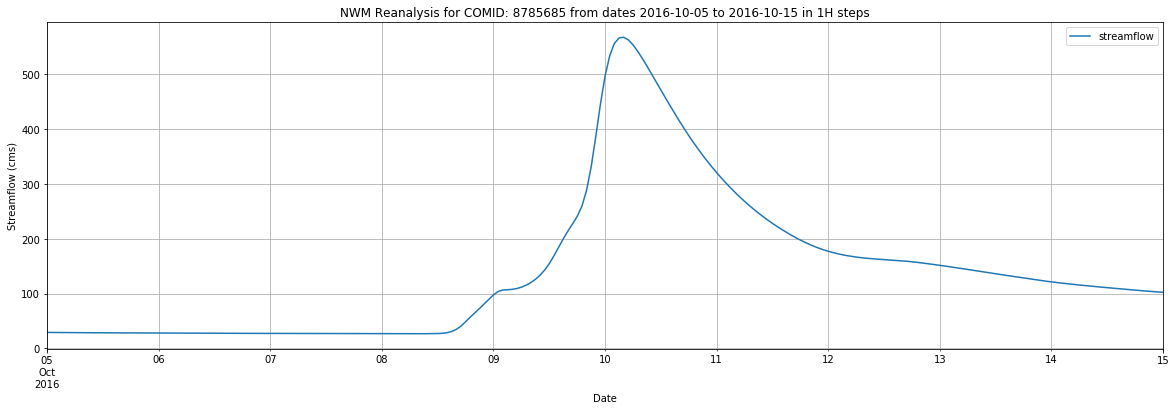

In [24]:
plotReanalysis(df, comid, freq)

In [14]:
df.to_csv(f'streamflow_{target_analysis}_{comid}_{start_date}_{end_date}_{freq}')

# End